In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:


%cd /content/gdrive/My Drive/my_data/stylegan_encoder

/content/gdrive/My Drive/my_data/stylegan_encoder


In [3]:
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import PIL.Image
import numpy as np


import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
import imageio

import os
import pickle
import config
import gzip
import json
from tqdm import tqdm_notebook, tqdm
import warnings
import cv2
from keras.models import load_model 

Using TensorFlow backend.


In [0]:
url_ffhq = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' 
_Gs_cache = dict()

def load_Gs(url):
    if url not in _Gs_cache:
        with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
            _G, _D, Gs = pickle.load(f)
        _Gs_cache[url] = Gs
    return _Gs_cache[url]

In [5]:
tflib.init_tf()
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=8)
my_Gs = load_Gs(url_ffhq)











Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:

transform_model = load_model('transform_model.hdf5')
age_model = load_model('age_model_2020_01_14.hdf5')



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.







/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [7]:
sed = 1322
np.random.seed(sed)
batch_size = 1
size_data_0=20000
size_data_1=20000
latent_male_35 = []
latent_male_55 = []

while size_data_1!=0 :
    if (size_data_0%1000==0 and size_data_0!=0) or(size_data_1%1000==0 and size_data_1!=0):
        print('size_data_0: '+str(size_data_0)+' size_data_1: '+str(size_data_1))


    src_latents = np.random.normal(size=[batch_size, + my_Gs.input_shape[1]])
    src_dlatents = my_Gs.components.mapping.run(src_latents, None)
    latents= src_dlatents.reshape(-1,1,1,18*512)
    age = age_model.predict(latents)


    if age[0][0][0]>=5 and age[0][0][0]<=40 and size_data_0!=0:
        for _, age_item in enumerate([20]):
            age_data = np.full((1,1,1,1), age_item, dtype=np.float)
            gender_data = np.full((1,1,1,1), 1., np.float32)
            target_latents, p_gender, p_age = transform_model.predict([latents, gender_data, age_data])
            latent_male_35.append(target_latents[0])
            size_data_0-=1
            
    if age[0][0][0]>=41 and size_data_1!=0:
        for _, age_item in enumerate([70]):
            age_data = np.full((1,1,1,1), age_item, dtype=np.float)
            gender_data = np.full((1,1,1,1), 1., np.float32)
            target_latents, p_gender, p_age = transform_model.predict([latents, gender_data, age_data])
            latent_male_55.append(target_latents[0])
            size_data_1-=1
        
latent_male_35 = np.array(latent_male_35)
latent_male_55 = np.array(latent_male_55)

size_data_0: 20000 size_data_1: 20000
size_data_0: 20000 size_data_1: 19999
size_data_0: 19000 size_data_1: 19635
size_data_0: 18000 size_data_1: 19295
size_data_0: 18000 size_data_1: 19295
size_data_0: 17124 size_data_1: 19000
size_data_0: 17123 size_data_1: 19000
size_data_0: 17122 size_data_1: 19000
size_data_0: 17121 size_data_1: 19000
size_data_0: 17000 size_data_1: 18965
size_data_0: 17000 size_data_1: 18965
size_data_0: 17000 size_data_1: 18964
size_data_0: 16000 size_data_1: 18570
size_data_0: 16000 size_data_1: 18569
size_data_0: 15000 size_data_1: 18199
size_data_0: 14477 size_data_1: 18000
size_data_0: 14476 size_data_1: 18000
size_data_0: 14475 size_data_1: 18000
size_data_0: 14474 size_data_1: 18000
size_data_0: 14473 size_data_1: 18000
size_data_0: 14473 size_data_1: 18000
size_data_0: 14472 size_data_1: 18000
size_data_0: 14471 size_data_1: 18000
size_data_0: 14471 size_data_1: 18000
size_data_0: 14470 size_data_1: 18000
size_data_0: 14469 size_data_1: 18000
size_data_0:

In [0]:
os.environ['KERAS_BACKEND']='tensorflow' # can choose theano, tensorflow, cntk
os.environ['THEANO_FLAGS']='floatX=float32,device=cuda,optimizer=fast_run,dnn.library_path=/usr/lib'



In [0]:
import keras.backend as K
if os.environ['KERAS_BACKEND'] =='theano':
    channel_axis=1
    K.set_image_data_format('channels_first')
    channel_first = True
else:
    K.set_image_data_format('channels_last')
    channel_axis=-1
    channel_first = False
    

In [0]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, ZeroPadding2D, BatchNormalization, Input, Dropout, DepthwiseConv2D
from keras.layers import Conv2DTranspose, Reshape, Activation, Cropping2D, Flatten,PReLU
from keras.layers import Concatenate,Multiply, Add, UpSampling2D,Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.activations import relu
from keras.initializers import RandomNormal

In [0]:
def __conv_init(a):
    print("conv_init", a)
    k = RandomNormal(0, 0.02)(a) # for convolution kernel
    k.conv_weight = True    
    return k

In [0]:
# Basic discriminator
def conv2d(f, *a, **k):
    return Conv2D(f, kernel_initializer = conv_init, *a, **k)
def batchnorm():
    return BatchNormalization(momentum=0.9, axis=channel_axis, epsilon=1.01e-5,
                                   gamma_initializer = gamma_init)
def BASIC_D(nc_in, ndf, max_layers=3, use_sigmoid=True):
    """DCGAN_D(nc, ndf, max_layers=3)
       nc: channels
       ndf: filters of the first layer
       max_layers: max hidden layers
    """    
    if channel_first:
        input_a =  Input(shape=(nc_in, None, None))
    else:
        input_a = Input(shape=(None, None, nc_in))
    _ = input_a
    _ = conv2d(ndf, kernel_size=4, strides=2, padding="same", name = 'First') (_)
    _ = LeakyReLU(alpha=0.2)(_)
    
    for layer in range(1, max_layers):        
        out_feat = ndf * min(2**layer, 8)
        _ = conv2d(out_feat, kernel_size=4, strides=2, padding="same", 
                   use_bias=False, name = 'pyramid.{0}'.format(layer)             
                        ) (_)
        _ = batchnorm()(_, training=1)        
        _ = LeakyReLU(alpha=0.2)(_)
    
    out_feat = ndf*min(2**max_layers, 8)
    _ = ZeroPadding2D(1)(_)
    _ = conv2d(out_feat, kernel_size=4,  use_bias=False, name = 'pyramid_last') (_)
    _ = batchnorm()(_, training=1)
    _ = LeakyReLU(alpha=0.2)(_)
    
    # final layer
    _ = ZeroPadding2D(1)(_)
    _ = conv2d(1, kernel_size=4, name = 'final'.format(out_feat, 1), 
               activation = "sigmoid" if use_sigmoid else None) (_)    
    return Model(inputs=[input_a], outputs=_)



In [0]:
conv_init = RandomNormal(0, 0.02)
gamma_init = RandomNormal(1., 0.02) 


In [0]:

def normalize():
#   return BatchNormalization(axis=get_filter_dim())
    return InstanceNormalization()

def scaleup(input, ngf, kss, strides, padding):
#   x = Conv2DTranspose(ngf, kss, strides=strides, padding=padding)(input)

    # upsample + conv
    x = UpSampling2D(strides)(input)
    x = Conv2D(ngf, kss, padding=padding)(x)
    return x


def res_block(input, filters, kernel_size=(3,3), strides=(1,1)):
    # conv_block:add(nn.SpatialReflectionPadding(1, 1, 1, 1))
    # conv_block:add(nn.SpatialConvolution(dim, dim, 3, 3, 1, 1, p, p))
    # conv_block:add(normalization(dim))
    # conv_block:add(nn.ReLU(true))
    x = input
    x = Lambda(lambda x: tf.pad(x, [[0,0], [1,1], [1,1], [0,0]], 'REFLECT'))(x)
    x = Conv2D(filters=filters, 
              kernel_size=kernel_size,
              strides=strides)(x)
    x = normalize()(x)
    x = Activation('relu')(x)

    x = Lambda(lambda x: tf.pad(x, [[0,0], [1,1], [1,1], [0,0]], 'REFLECT'))(x)
    x = Conv2D(filters=filters, 
              kernel_size=kernel_size,
              strides=strides)(x)
    x = normalize()(x)

#   merged = Concatenate(axis=get_filter_dim())([input, x])
    merged = Add()([input, x])
    return merged

def resnet_6blocks(input_shape, output_nc, ngf, **kwargs):
    ks = 3
    f = 7
    p = int((f-1)/2)

    input = Input(input_shape)
    # local e1 = data - nn.SpatialReflectionPadding(p, p, p, p) - nn.SpatialConvolution(3, ngf, f, f, 1, 1) - normalization(ngf) - nn.ReLU(true)
    x = input
    x = Lambda(lambda x: tf.pad(x, [[0,0], [3,3], [3,3], [0,0]], 'REFLECT'))(x)
    x = Conv2D(ngf, (f,f))(x)
    x = normalize()(x)
    x = Activation('relu')(x)

    # local e2 = e1 - nn.SpatialConvolution(ngf, ngf*2, ks, ks, 2, 2, 1, 1) - normalization(ngf*2) - nn.ReLU(true)
    x = Conv2D(ngf*2, (ks,ks), strides=(2,2), padding='same')(x)
    x = normalize()(x)
    x = Activation('relu')(x)

    # local e3 = e2 - nn.SpatialConvolution(ngf*2, ngf*4, ks, ks, 2, 2, 1, 1) - normalization(ngf*4) - nn.ReLU(true)
    x = Conv2D(ngf*4, (ks,ks), strides=(2,2), padding='same')(x)
    x = normalize()(x)
    x = Activation('relu')(x)

    # local d1 = e3 - build_res_block(ngf*4, padding_type) - build_res_block(ngf*4, padding_type) - build_res_block(ngf*4, padding_type) 
    #  - build_res_block(ngf*4, padding_type) - build_res_block(ngf*4, padding_type) - build_res_block(ngf*4, padding_type)
    x = res_block(x, ngf*4)
    x = res_block(x, ngf*4)
    x = res_block(x, ngf*4)
    x = res_block(x, ngf*4)
    x = res_block(x, ngf*4)
    x = res_block(x, ngf*4)

    # local d2 = d1 - nn.SpatialFullConvolution(ngf*4, ngf*2, ks, ks, 2, 2, 1, 1,1,1) - normalization(ngf*2) - nn.ReLU(true)
    # x = Conv2DTranspose(ngf*2, (ks,ks), strides=(2,2), padding='same')(x)
    x = scaleup(x, ngf*2, (ks, ks), strides=(2,2), padding='same')
    x = normalize()(x)
    x = Activation('relu')(x)
    
    # local d3 = d2 - nn.SpatialFullConvolution(ngf*2, ngf, ks, ks, 2, 2, 1, 1,1,1) - normalization(ngf) - nn.ReLU(true)
    # x = Conv2DTranspose(ngf, (ks,ks), strides=(2,2), padding='same')(x)
    x = scaleup(x, ngf, (ks, ks), strides=(2,2), padding='same')
    x = normalize()(x)
    x = Activation('relu')(x)

    # local d4 = d3 - nn.SpatialReflectionPadding(p, p, p, p) - nn.SpatialConvolution(ngf, output_nc, f, f, 1, 1) - nn.Tanh()
    x = Lambda(lambda x: tf.pad(x, [[0,0], [3,3], [3,3], [0,0]], 'REFLECT'))(x)
    x = Conv2D(output_nc, (f,f))(x)
    x = Activation('tanh')(x)
    
    model = Model(input, [x], name=kwargs.get('name',None))
    print('Model resnet 6blocks:')
    model.summary()
    return model


In [0]:
from keras.layers import Layer, InputSpec
from keras import initializers, regularizers, constraints
from keras import backend as K


class InstanceNormalization(Layer):
    """Instance normalization layer.
    Normalize the activations of the previous layer at each step,
    i.e. applies a transformation that maintains the mean activation
    close to 0 and the activation standard deviation close to 1.
    # Arguments
        axis: Integer, the axis that should be normalized
            (typically the features axis).
            For instance, after a `Conv2D` layer with
            `data_format="channels_first"`,
            set `axis=1` in `InstanceNormalization`.
            Setting `axis=None` will normalize all values in each
            instance of the batch.
            Axis 0 is the batch dimension. `axis` cannot be set to 0 to avoid errors.
        epsilon: Small float added to variance to avoid dividing by zero.
        center: If True, add offset of `beta` to normalized tensor.
            If False, `beta` is ignored.
        scale: If True, multiply by `gamma`.
            If False, `gamma` is not used.
            When the next layer is linear (also e.g. `nn.relu`),
            this can be disabled since the scaling
            will be done by the next layer.
        beta_initializer: Initializer for the beta weight.
        gamma_initializer: Initializer for the gamma weight.
        beta_regularizer: Optional regularizer for the beta weight.
        gamma_regularizer: Optional regularizer for the gamma weight.
        beta_constraint: Optional constraint for the beta weight.
        gamma_constraint: Optional constraint for the gamma weight.
    # Input shape
        Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a Sequential model.
    # Output shape
        Same shape as input.
    # References
        - [Layer Normalization](https://arxiv.org/abs/1607.06450)
        - [Instance Normalization: The Missing Ingredient for Fast Stylization](
        https://arxiv.org/abs/1607.08022)
    """
    def __init__(self,
                 axis=-1,
                 epsilon=1e-8,
                 center=True,
                 scale=True,
                 beta_initializer='zeros',
                 gamma_initializer='ones',
                 beta_regularizer=None,
                 gamma_regularizer=None,
                 beta_constraint=None,
                 gamma_constraint=None,
                 **kwargs):
        super(InstanceNormalization, self).__init__(**kwargs)
        self.supports_masking = True
        self.axis = axis
        self.epsilon = epsilon
        self.center = center
        self.scale = scale
        self.beta_initializer = initializers.get(beta_initializer)
        self.gamma_initializer = initializers.get(gamma_initializer)
        self.beta_regularizer = regularizers.get(beta_regularizer)
        self.gamma_regularizer = regularizers.get(gamma_regularizer)
        self.beta_constraint = constraints.get(beta_constraint)
        self.gamma_constraint = constraints.get(gamma_constraint)

    def build(self, input_shape):
        ndim = len(input_shape)
        if self.axis == 0:
            raise ValueError('Axis cannot be zero')

        if (self.axis is not None) and (ndim == 2):
            raise ValueError('Cannot specify axis for rank 1 tensor')

        self.input_spec = InputSpec(ndim=ndim)

        if self.axis is None:
            shape = (1,)
        else:
            shape = (input_shape[self.axis],)

        if self.scale:
            self.gamma = self.add_weight(shape=shape,
                                         name='gamma',
                                         initializer=self.gamma_initializer,
                                         regularizer=self.gamma_regularizer,
                                         constraint=self.gamma_constraint)
        else:
            self.gamma = None
        if self.center:
            self.beta = self.add_weight(shape=shape,
                                        name='beta',
                                        initializer=self.beta_initializer,
                                        regularizer=self.beta_regularizer,
                                        constraint=self.beta_constraint)
        else:
            self.beta = None
        self.built = True

    def call(self, inputs, training=None):
        input_shape = K.int_shape(inputs)
        reduction_axes = list(range(0, len(input_shape)))

        if self.axis is not None:
            del reduction_axes[self.axis]

        del reduction_axes[0]

        mean = K.mean(inputs, reduction_axes, keepdims=True)
        stddev = K.std(inputs, reduction_axes, keepdims=True) + self.epsilon
        normed = (inputs - mean) / stddev

        broadcast_shape = [1] * len(input_shape)
        if self.axis is not None:
            broadcast_shape[self.axis] = input_shape[self.axis]

        if self.scale:
            broadcast_gamma = K.reshape(self.gamma, broadcast_shape)
            normed = normed * broadcast_gamma
        if self.center:
            broadcast_beta = K.reshape(self.beta, broadcast_shape)
            normed = normed + broadcast_beta
        return normed

    def get_config(self):
        config = {
            'axis': self.axis,
            'epsilon': self.epsilon,
            'center': self.center,
            'scale': self.scale,
            'beta_initializer': initializers.serialize(self.beta_initializer),
            'gamma_initializer': initializers.serialize(self.gamma_initializer),
            'beta_regularizer': regularizers.serialize(self.beta_regularizer),
            'gamma_regularizer': regularizers.serialize(self.gamma_regularizer),
            'beta_constraint': constraints.serialize(self.beta_constraint),
            'gamma_constraint': constraints.serialize(self.gamma_constraint)
        }
        base_config = super(InstanceNormalization, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))




In [0]:
import tensorflow as tf

In [0]:
from keras.layers import MaxPooling2D,Add,Multiply,Dense,ReLU,AveragePooling2D

In [0]:
def gram_matrix(x,norm_by_channels=True):
    '''
    Returns the Gram matrix of the tensor x.
    '''

    if K.ndim(x) == 4:
        # Swap from (H, W, C) to (B, C, H, W)
        x = K.permute_dimensions(x, (0, 3, 1, 2))
        shape = K.shape(x)
        B, C, H, W = shape[0], shape[1],shape[2],shape[3]
        # Reshape as a batch of 2D matrices with vectorized channels
        features = K.reshape(x, K.stack([B, C, H*W]))
        # This is a batch of Gram matrices (B, C, C).
        gram = K.batch_dot(features, features, axes=2)
        
    else:
        raise ValueError('The input tensor should be either a 3d (H, W, C) or 4d (B, H, W, C) tensor.')
    # Normalize the Gram matrix
    if norm_by_channels:
        denominator = C * H * W # Normalization from Johnson
    else:
        denominator = H * W # Normalization from Google
    gram = gram / ( K.cast(denominator, x.dtype)+K.epsilon())
    gram = K.reshape(gram,K.stack([B,C,C,1]))

    return gram

def gram_matrix_shape(in_shape):
  B, H, W, C = in_shape
  return (B,C,C,1)


def gram_block(c_layer,t):
  c_layer = Conv2D(32,(3,3),padding='same')(c_layer)
  c_layer = Lambda(lambda x: gram_matrix(x),name='gram_matrix_'+str(t),output_shape=gram_matrix_shape)(c_layer)
  c_layer = Conv2D(16,(3,3),strides=2,padding='same')(c_layer)
  c_layer = BatchNormalization()(c_layer)
  c_layer = Activation('relu')(c_layer)
  c_layer = Conv2D(32,(3,3),strides=2,padding='same')(c_layer)
  c_layer = BatchNormalization()(c_layer)
  c_layer = Activation('relu')(c_layer)
  c_layer = AveragePooling2D()(c_layer)
  return c_layer



In [0]:
conv_init = RandomNormal(0, 0.0001)

def gram_net_discriminator(input_shape_img=(512,512,3)):
  in_layer = Input(input_shape_img)
  c_layer = in_layer
  gram_matrix_layers = []

  c_layer_1 = gram_block(c_layer,0)

  c_layer =  Conv2D(64,(7,7),strides=2,padding='same')(c_layer)

  c_layer_11 = gram_block(c_layer,1)
  print()

  c_layer_1 = Concatenate(-1)([c_layer_1,c_layer_11])

  c_layer = AveragePooling2D()(c_layer)

  c_layer_11 = gram_block(c_layer,2)

  c_layer_1 = Concatenate(-1)([c_layer_1,c_layer_11])

  filters = [64,128,256,512]
  for i in range(4):
    mult = c_layer
    if i==0:
      c_layer = Conv2D(filters[i],(3,3),padding='same')(c_layer)
      c_layer = BatchNormalization()(c_layer)
      c_layer = Activation('relu')(c_layer)
      c_layer = Conv2D(filters[i],(3,3),padding='same')(c_layer)
      c_layer = BatchNormalization()(c_layer)
      c_layer = Activation('relu')(c_layer)

      c_layer = Add()([c_layer,mult])

      c_layer_11 = gram_block(c_layer,3)
      c_layer_1 = Concatenate(-1)([c_layer_1,c_layer_11])

      c_layer = Conv2D(filters[i],(3,3),padding='same')(c_layer)
      c_layer = BatchNormalization()(c_layer)
      c_layer = Activation('relu')(c_layer)
      c_layer = Conv2D(filters[i],(3,3),padding='same')(c_layer)
      c_layer = BatchNormalization()(c_layer)
      c_layer = Activation('relu')(c_layer)

      c_layer = Add()([c_layer,mult])

      c_layer_11 = gram_block(c_layer,4)
      c_layer_1 = Concatenate(-1)([c_layer_1,c_layer_11])

      t=4

    else:
      
      mult = Conv2D(filters[i],(1,1),padding='same')(c_layer)
      mult = AveragePooling2D()(mult)
      c_layer = Conv2D(filters[i],(3,3),strides = (2,2),padding='same')(c_layer)
      c_layer = BatchNormalization()(c_layer)
      c_layer = Activation('relu')(c_layer)
      c_layer = Conv2D(filters[i],(3,3),padding='same')(c_layer)
      c_layer = BatchNormalization()(c_layer)
      c_layer = Activation('relu')(c_layer)

      c_layer = Add()([c_layer,mult])

      c_layer_11 = gram_block(c_layer,int(i+t))
      c_layer_1 = Concatenate(-1)([c_layer_1,c_layer_11])

      c_layer = Conv2D(filters[i],(3,3),padding='same')(c_layer)
      c_layer = BatchNormalization()(c_layer)
      c_layer = Activation('relu')(c_layer)
      c_layer = Conv2D(filters[i],(3,3),padding='same')(c_layer)
      c_layer = BatchNormalization()(c_layer)
      c_layer = Activation('relu')(c_layer)

      c_layer = Add()([c_layer,mult])
      t=t+1
      if i!=3:
        c_layer_11 = gram_block(c_layer,int(i+t))
        c_layer_1 = Concatenate(-1)([c_layer_1,c_layer_11])
        t=t+1
      
  c_layer = AveragePooling2D((4,4))(c_layer)
  c_layer = Dense(256,kernel_initializer = conv_init,)(c_layer)
  c_layer = BatchNormalization()(c_layer)
  c_layer = Activation('relu')(c_layer)
  c_layer = Dense(256,kernel_initializer = conv_init,)(c_layer)
  c_layer = BatchNormalization()(c_layer)
  c_layer = Activation('relu')(c_layer)

  c_layer = Concatenate(-1)([c_layer, c_layer_1])
  c_layer = DepthwiseConv2D((4,4))(c_layer)

  c_layer = BatchNormalization()(c_layer)
  c_layer = Activation('relu')(c_layer)  


  c_layer = Dense(1,kernel_initializer = conv_init)(c_layer)


  model = Model(in_layer,c_layer)
 
  return model



In [0]:
nc_in = 3
nc_out = 3
ngf = 64
ndf = 64
use_lsgan = True
λ = 10 if use_lsgan else 100

loadSize = -1
imageSize = 512
batchSize = 1
lrD = 2e-4
lrG = 2e-4

In [21]:
#netDA = BASIC_D(nc_in, ndf, use_sigmoid = not use_lsgan)
#netDB = BASIC_D(nc_out, ndf, use_sigmoid = not use_lsgan)
netDA= gram_net_discriminator()
netDB= gram_net_discriminator()
netDA.summary()






Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 256, 256, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
average_pooling2d_3 (AveragePoo (None, 128, 128, 64) 0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 128, 128, 64) 36928       average_pooling2d_3[0][0]        
_______________________________________________________________________________________

In [22]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf

ngf=64
netGB=resnet_6blocks((512,512,3),3,ngf)
netGA=resnet_6blocks((512,512,3),3,ngf)
#netGB = unet_new(imageSize)
#netGA = unet_new(imageSize)
netGA.summary()


Model resnet 6blocks:
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 518, 518, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_101 (Conv2D)             (None, 512, 512, 64) 9472        lambda_1[0][0]                   
__________________________________________________________________________________________________
instance_normalization_1 (Insta (None, 512, 512, 64) 128         conv2d_101[0][0]                 
_____________________________________________________________________

In [23]:
from keras.applications.vgg16 import VGG16, preprocess_input


vgg = VGG16(include_top=False, weights='imagenet', input_shape=(512, 512, 3)) 
loss_model = Model(inputs=vgg.input, outputs=[vgg.get_layer('block1_conv2').output,vgg.get_layer('block2_conv2').output]) 
loss_model.trainable = False




58892288/58889256 [==============================] - 1s 0us/step


In [0]:
def perceptual_loss00(y_true, y_pred): 
    n_v = tf.constant([[[[103.939, 116.779, 123.68]]]])
    y_true = ((y_true[...,::-1]+1)*127.5 - n_v)
    y_pred = ((y_pred[...,::-1]+1)*127.5 - n_v)
    
    
    true_loss = loss_model(y_true)
    pred_loss = loss_model(y_pred)
    loss = 0
    #loss +=1*K.mean(K.abs(y_pred - y_true))
    loss += 0.0001*K.mean(K.square(true_loss[0] - pred_loss[0]))
    loss += 0.0001*K.mean(K.square(true_loss[1] - pred_loss[1]))
    return loss

In [0]:
def perceptual_loss00(y_true, y_pred): 
    n_v = tf.constant([[[[103.939, 116.779, 123.68]]]])
    y_true = ((y_true[...,::2,::2,::-1]+1)*127.5 - n_v)
    y_pred = ((y_pred[...,::2,::2,::-1]+1)*127.5 - n_v)

    
    true_loss = loss_model(y_true)
    pred_loss = loss_model(y_pred)
    loss = 0
    loss +=1*K.mean(K.abs(y_pred - y_true))
    loss += 0.001*K.mean(K.square(true_loss[0] - pred_loss[0]))
    loss += 0.0005*K.mean(K.square(true_loss[1] - pred_loss[1]))
    return loss

from keras.applications.vgg16 import VGG16, preprocess_input

vgg = VGG16(include_top=False, weights='imagenet', input_shape=(256, 256, 3)) 
loss_model = Model(inputs=vgg.input, outputs=[vgg.get_layer('block1_conv2').output,
                                              vgg.get_layer('block2_conv2').output]) 
loss_model.trainable = False

In [0]:
from keras.optimizers import RMSprop, SGD, Adam
if use_lsgan:
    loss_fn = lambda output, target : K.mean(K.abs(K.square(output-target)))
else:
    loss_fn = lambda output, target : -K.mean(K.log(output+1e-12)*target+K.log(1-output+1e-12)*(1-target))


def cycle_variables(netG1, netG2):
    real_input = netG1.inputs[0]
    fake_output = netG1.outputs[0]
    rec_input = netG2([fake_output])
   

    fn_generate = K.function([real_input], [fake_output, rec_input])
    return real_input, fake_output, rec_input, fn_generate

real_A, fake_B, rec_A, cycleA_generate  = cycle_variables(netGB, netGA)
real_B, fake_A, rec_B, cycleB_generate = cycle_variables(netGA, netGB)

In [0]:
def D_loss(netD, real, fake, rec):
    output_real = netD([real])
    output_fake = netD([fake])
    loss_D_real = loss_fn(output_real, K.ones_like(output_real))
    loss_D_fake = loss_fn(output_fake, K.zeros_like(output_fake))
    loss_G = loss_fn(output_fake, K.ones_like(output_fake))
    loss_D = loss_D_real+loss_D_fake
    loss_cyc = K.mean(K.abs(rec-real))+0.0005*perceptual_loss00(real,rec)

    return loss_D, loss_G, loss_cyc

loss_DA, loss_GA, loss_cycA = D_loss(netDA, real_A, fake_A, rec_A)
loss_DB, loss_GB, loss_cycB = D_loss(netDB, real_B, fake_B, rec_B)
loss_cyc = loss_cycA+loss_cycB
#loss_m_AB = K.mean(K.abs(m_loss_A-m_loss_B),axis=[1,2],keepdims=True)
#loss_a_AB = K.mean(K.abs(a_loss_A-a_loss_B),axis=[1,2],keepdims=True)




In [0]:
loss_G = loss_GA+loss_GB+λ*loss_cyc#+loss_m_A+loss_m_B+loss_a_A+loss_a_B
loss_D = loss_DA+loss_DB

weightsD = netDA.trainable_weights + netDB.trainable_weights
weightsG = netGA.trainable_weights + netGB.trainable_weights

training_updates = Adam(lr=lrD*0.1, beta_1=0.5).get_updates(weightsD,[],loss_D)
netD_train = K.function([real_A, real_B],[loss_DA/2, loss_DB/2], training_updates)
training_updates = Adam(lr=lrG*0.1, beta_1=0.5).get_updates(weightsG,[], loss_G)
netG_train = K.function([real_A, real_B], [loss_GA, loss_GB, loss_cyc], training_updates)



In [29]:
train_A = latent_male_35
train_B = latent_male_55

print(train_A.shape)
print(train_B.shape)

(20000, 1, 1, 9216)
(20000, 1, 1, 9216)


In [0]:
import dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")




In [0]:
def correct_perspectiv_with_landmarks(image):

    new_image = np.pad(image, ((128,128),(128,128),(0,0)), 'constant')
    landmarks_list_0 = None
    rects_0 = detector(new_image)
    landmarks_0=[]
    for face in rects_0:
        landmarks_0 = predictor(new_image, face)
        landmarks_list_0 = []
        for i in range(0, landmarks_0.num_parts):
            landmarks_list_0.append((landmarks_0.part(i).x, landmarks_0.part(i).y))

    if landmarks_list_0 is None:
        return new_image
    
    landmarks_list_0 = np.array(landmarks_list_0)

    const = 16
    
    dst_pts_inpaint = np.float32([landmarks_list_0[36], landmarks_list_0[45], landmarks_list_0[48], landmarks_list_0[54]])
    src_pts = np.float32([[356-const, 178+const*2], [156+const,178+const*2], [336-const, 334-const*2], [186+const, 334-const*2]])
    #dst_pts_inpaint = np.float32([[128, 384], [128,128], [384, 339], [384, 173]])


    iM_inpaint = cv2.getPerspectiveTransform(dst_pts_inpaint, src_pts)
    
    frame_rgb_final = cv2.warpPerspective(new_image, iM_inpaint, (512,512))

    return frame_rgb_final

In [0]:
def correct_warp_with_landmarks(image):

    new_image = np.pad(image, ((128,128),(128,128),(0,0)), 'constant')
    landmarks_list_0 = None
    rects_0 = detector(new_image)
    landmarks_0=[]
    for face in rects_0:
        landmarks_0 = predictor(new_image, face)
        landmarks_list_0 = []
        for i in range(0, landmarks_0.num_parts):
            landmarks_list_0.append((landmarks_0.part(i).x, landmarks_0.part(i).y))

    if landmarks_list_0 is None:
        return new_image
    
    landmarks_list_0 = np.array(landmarks_list_0)

    const = 32
    
    dst_pts_inpaint = np.float32([landmarks_list_0[36], landmarks_list_0[45], landmarks_list_0[32]])
    src_pts = np.float32([[356-const, 178+const*2], [156+const,178+const*2], [256, 230+const*2]])
    #dst_pts_inpaint = np.float32([[128, 384], [128,128], [384, 339], [384, 173]])


    iM_inpaint = cv2.getAffineTransform(dst_pts_inpaint, src_pts)
    
    frame_rgb_final = cv2.warpAffine(new_image, iM_inpaint, (512,512))

    return frame_rgb_final

In [0]:
def correct_warp_with_landmarks_new(image):
    new_image = image
    landmarks_list_0 = None
    rects_0 = detector(new_image)
    landmarks_0=[]
    for face in rects_0:
        landmarks_0 = predictor(new_image, face)
        landmarks_list_0 = []
        for i in range(0, landmarks_0.num_parts):
            landmarks_list_0.append((landmarks_0.part(i).x, landmarks_0.part(i).y))

    const = 32 
    if landmarks_list_0 is None:
        dst_pts_inpaint = np.float32([[175.,125.], [75.,125.],[140.,170.]])
    else:
        landmarks_list_0 = np.array(landmarks_list_0)
        dst_pts_inpaint = np.float32([landmarks_list_0[36], landmarks_list_0[45], landmarks_list_0[32]])     
 
    src_pts = np.float32([[512 - (156+const), 178+const*2], [156+const,178+const*2], [256, 230+const*2]])
    #dst_pts_inpaint = np.float32([[128, 384], [128,128], [384, 339], [384, 173]])

    iM_inpaint = cv2.getAffineTransform(dst_pts_inpaint, src_pts)
    frame_rgb_final = cv2.warpAffine(new_image, iM_inpaint, (512,512),borderMode=cv2.BORDER_REPLICATE)

    return frame_rgb_final

In [0]:


def minibatch(data, batchsize):
    length = len(data)
    epoch = i = 0
    tmpsize = None    
    while True:
        size = tmpsize if tmpsize else batchsize
        if i+size > length:
            shuffle(data)
            i = 0
            epoch+=1        
        rtn = [correct_warp_with_landmarks_new(cv2.resize(my_Gs.components.synthesis.run(data[j:j+1].reshape(-1,18,512), randomize_noise=False, **synthesis_kwargs)[0],(256,256)))/255*2-1 for j in np.random.randint(0,data.shape[0], size)]
        i+=size
        tmpsize = yield epoch, np.float32(rtn)       

def minibatchAB(dataA, dataB, batchsize):
    batchA=minibatch(dataA, batchsize)
    batchB=minibatch(dataB, batchsize)
    tmpsize = None    
    while True:        
        ep1, A = batchA.send(tmpsize)
        ep2, B = batchB.send(tmpsize)
        tmpsize = yield max(ep1, ep2), A, B

In [0]:

plt.rcParams['figure.figsize'] = (30,30)
def showX(X, rows=1):
    assert X.shape[0]%rows == 0
    int_X = ( (X+1)/2*255).clip(0,255).astype('uint8')
    if channel_first:
        int_X = np.moveaxis(int_X.reshape(-1,3,imageSize,imageSize), 1, 3)
    else:
        int_X = int_X.reshape(-1,imageSize,imageSize, 3)
    int_X = int_X.reshape(rows, -1, imageSize, imageSize,3).swapaxes(1,2).reshape(rows*imageSize,-1, 3)
    plt.imshow(int_X.astype('uint8'))
    plt.show()

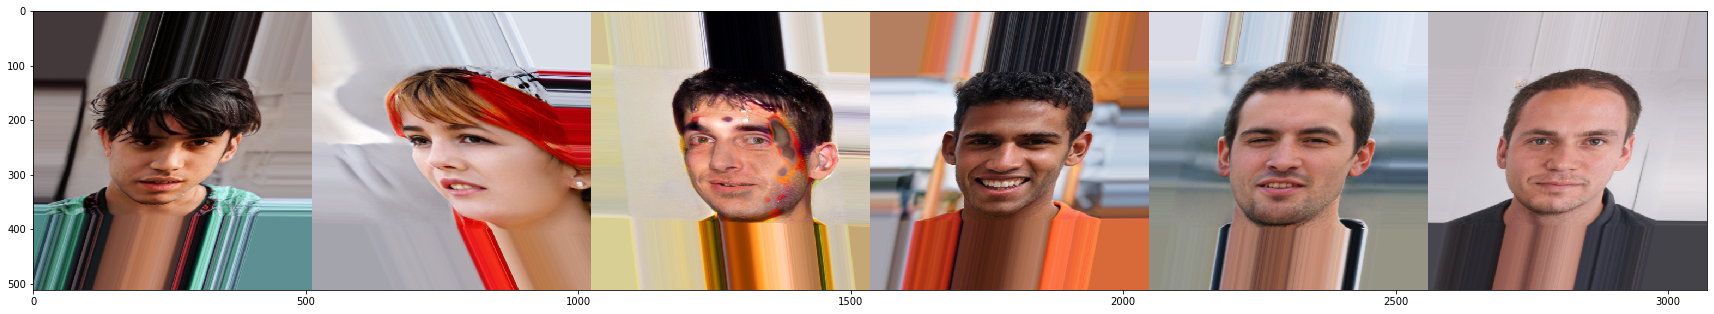

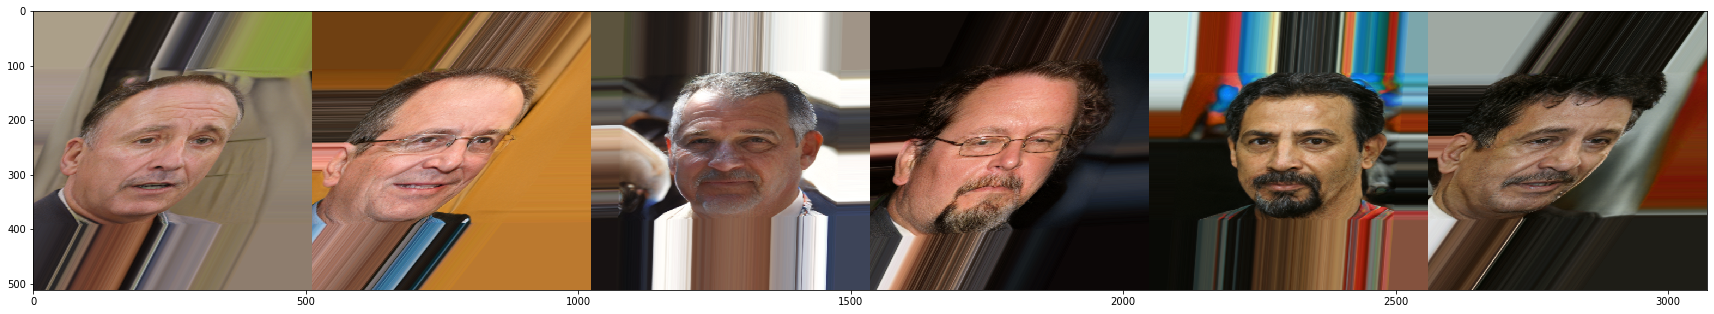

In [36]:
train_batch = minibatchAB(train_A, train_B, 6)

_, A, B = next(train_batch)
showX(A)
showX(B)

del train_batch, A, B

In [0]:
def showG(A,B):
    assert A.shape==B.shape
    def G(fn_generate, X):

        r = np.array([fn_generate([X[i:i+1]]) for i in range(X.shape[0])])
        return r.swapaxes(0,1)[:,:,0]        
    rA = G(cycleA_generate, A)
    rB = G(cycleB_generate, B)
    arr = np.concatenate([A,B,rA[0],rB[0],rA[1],rB[1]])
    #new = np.concatenate([rA[0][0],rB[0][0]],axis=1)
    #plt.imshow(( (new+1)/2*255).clip(0,255).astype('uint8'))
    #plt.show()
    showX(arr, 3)

In [0]:

import time
from IPython.display import clear_output
t0 = time.time()

std_loss_A = []
mean_loss_A =[]
std_loss_B = []
mean_loss_B =[]
errCyc_sum = errGA_sum = errGB_sum = errDA_sum = errDB_sum = m_loss_A_sum = a_loss_A_sum=m_loss_B_sum = a_loss_B_sum = 0


display_iters = 25
#val_batch = minibatch(valAB, 6, direction)

niter = 1500
gen_iterations = 0
epoch = 1200
batchSize = 2
train_batch = minibatchAB(train_A, train_B, batchSize)





In [39]:
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from skimage.transform import resize
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from skimage.transform import resize
model_fid = InceptionV3(include_top=False, pooling='avg', input_shape=(512,512,3))

87916544/87910968 [==============================] - 1s 0us/step


In [0]:
def calculte_fid(real_data,fake_data,fid_batch=512, id0 = 0):
  
        
    fid_image_real = []
    fid_image_fake = []
    select_real=np.random.randint(0,real_data.shape[0], fid_batch)
    select_fake=np.random.randint(0,fake_data.shape[0], fid_batch)
      
    for range_latent_real in real_data[select_real]:
        range_image_real = correct_warp_with_landmarks(cv2.resize(my_Gs.components.synthesis.run(range_latent_real[None,...].reshape(-1,18,512), randomize_noise=False, **synthesis_kwargs)[0],(256,256)))[None,...]/255*2-1 

        if id0==0:
            rA =  netGA.predict(range_image_real)[0]
        else:
            rA = netGB.predict(range_image_real)[0]

      
        fid_image_fake.append(((rA+1)/2*255).clip(0,255).astype('uint8'))
        
    for range_latent_fake in fake_data[select_fake]:
        fid_image_real.append(correct_warp_with_landmarks(cv2.resize(my_Gs.components.synthesis.run(range_latent_fake[None,...].reshape(-1,18,512), randomize_noise=False, **synthesis_kwargs)[0],(256,256))))
        
    fid_image_fake = np.array(fid_image_fake).astype(np.float32)
    fid_image_real = np.array(fid_image_real).astype(np.float32)

    fake_images = scale_images(fid_image_fake,(512,512,3))
    new_real = scale_images(fid_image_real,(512,512,3))
    images1 = preprocess_input(new_real)
    images2 = preprocess_input(fake_images)
      

    fid = calculate_fid_0(model_fid, images1, images2)
    print(fid)
    return fid

def calculate_fid_0(model, images1, images2):
    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance statistics
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = numpy.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
     # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid
    
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
        # resize with nearest neighbor interpolation
        new_image = resize(image, new_shape, 0)
        # store
        images_list.append(new_image)
    return asarray(images_list)

In [0]:
netGA.load_weights('netGA_512_2020.02.05_exp.hdf5')
netGB.load_weights('netGB_512_2020.02.05_exp.hdf5')
netDA.load_weights('netDA_512_2020.02.05_exp.hdf5')
netDB.load_weights('netDB_512_2020.02.05_exp.hdf5')

In [0]:
percept_loss = []

In [0]:
fid_A_loss = []
fid_B_loss = []

In [45]:
errCyc_sum = errGA_sum = errGB_sum = errDA_sum = errDB_sum=m_loss_A_sum = a_loss_A_sum=m_loss_B_sum = a_loss_B_sum = 0
        
display_iters = 200
#val_batch = minibatch(valAB, 6, direction)

niter = 1500
gen_iterations = 0
epoch = 1200
batchSize = 1
train_batch = minibatchAB(train_A, train_B, batchSize)


while epoch < niter: 
    epoch, A, B = next(train_batch)        
    errDA, errDB  = netD_train([A, B])
    errDA_sum +=errDA
    errDB_sum +=errDB

    # epoch, trainA, trainB = next(train_batch)
    errGA, errGB, errCyc = netG_train([A, B])
    
    errGA_sum += errGA
    errGB_sum += errGB
    errCyc_sum += errCyc
    
    gen_iterations+=1
    if gen_iterations%500==0:
      netGA.save_weights('netGA_512_2020.02.05_exp.hdf5')
      netGB.save_weights('netGB_512_2020.02.05_exp.hdf5')
      netDA.save_weights('netDA_512_2020.02.05_exp.hdf5')
      netDB.save_weights('netDB_512_2020.02.05_exp.hdf5')

    if gen_iterations%display_iters==0:
        clear_output()
        print('[%d/%d][%d] Loss_D: %f %f Loss_G: %f %f loss_cyc %f '
        % (epoch, niter, gen_iterations, errDA_sum/display_iters, errDB_sum/display_iters,
           errGA_sum/display_iters, errGB_sum/display_iters, 
           errCyc_sum/display_iters), time.time()-t0)
        _, A, B = train_batch.send(3)
        percept_loss.append(errCyc_sum/display_iters)
        showG(A,B)        
        errCyc_sum = errGA_sum = errGB_sum = errDA_sum = errDB_sum=m_loss_A_sum = a_loss_A_sum=m_loss_B_sum = a_loss_B_sum = 0
        plt.plot(percept_loss[1:])
        plt.show()

    if gen_iterations%1000==0:

        test_image0 = correct_warp_with_landmarks_new(cv2.resize(imageio.imread('images/IMG_0404_resized_01.png'),(256,256)))[None,...]/255*2-1
        test_image1 = correct_warp_with_landmarks_new(cv2.resize(imageio.imread('images/IMG_0403_resized_01.png'),(256,256)))[None,...]/255*2-1
        test_image2 = correct_warp_with_landmarks_new(cv2.resize(imageio.imread('images/IMG_0406_resized_01.png'),(256,256)))[None,...]/255*2-1

        rA0 = netGB.predict(test_image0)
        rB0 = netGA.predict(test_image0)
        rA1 = netGB.predict(test_image1)
        rB1 = netGA.predict(test_image1)
        rA2 = netGB.predict(test_image2)
        rB2 = netGA.predict(test_image2)
        
        plt.imshow(np.concatenate([( (rB0[0]+1)/2*255).clip(0,255).astype('uint8'),correct_warp_with_landmarks_new(cv2.resize(imageio.imread('images/IMG_0404_resized_01.png'),(512,512))),( (rA0[0]+1)/2*255).clip(0,255).astype('uint8')],axis=1))
        plt.show()
        plt.imshow(np.concatenate([( (rB1[0]+1)/2*255).clip(0,255).astype('uint8'),correct_warp_with_landmarks_new(cv2.resize(imageio.imread('images/IMG_0403_resized_01.png'),(512,512))),( (rA1[0]+1)/2*255).clip(0,255).astype('uint8')],axis=1))
        plt.show()
        plt.imshow(np.concatenate([( (rB2[0]+1)/2*255).clip(0,255).astype('uint8'),correct_warp_with_landmarks_new(cv2.resize(imageio.imread('images/IMG_0406_resized_01.png'),(512,512))),( (rA2[0]+1)/2*255).clip(0,255).astype('uint8')],axis=1))
        plt.show()





Output hidden; open in https://colab.research.google.com to view.

In [0]:
import imageio
import cv2

test_image0 = correct_warp_with_landmarks_new(cv2.resize(imageio.imread('images/IMG_0404_resized_01.png'),(256,256)))[None,...]/255*2-1
test_image1 = correct_warp_with_landmarks_new(cv2.resize(imageio.imread('images/IMG_0403_resized_01.png'),(256,256)))[None,...]/255*2-1
test_image2 = correct_warp_with_landmarks_new(cv2.resize(imageio.imread('images/IMG_0406_resized_01.png'),(256,256)))[None,...]/255*2-1



rA0 = netGB.predict(test_image0)
rB0 = netGA.predict(test_image0)
rA1 = netGB.predict(test_image1)
rB1 = netGA.predict(test_image1)
rA2 = netGB.predict(test_image2)
rB2 = netGA.predict(test_image2)

plt.imshow(np.concatenate([( (rB0[0]+1)/2*255).clip(0,255).astype('uint8'),correct_warp_with_landmarks_new(cv2.resize(imageio.imread('images/IMG_0404_resized_01.png'),(512,512))),( (rA0[0]+1)/2*255).clip(0,255).astype('uint8')],axis=1))
plt.show()
plt.imshow(np.concatenate([( (rB1[0]+1)/2*255).clip(0,255).astype('uint8'),correct_warp_with_landmarks_new(cv2.resize(imageio.imread('images/IMG_0403_resized_01.png'),(512,512))),( (rA1[0]+1)/2*255).clip(0,255).astype('uint8')],axis=1))
plt.show()
plt.imshow(np.concatenate([( (rB2[0]+1)/2*255).clip(0,255).astype('uint8'),correct_warp_with_landmarks_new(cv2.resize(imageio.imread('images/IMG_0406_resized_01.png'),(512,512))),( (rA2[0]+1)/2*255).clip(0,255).astype('uint8')],axis=1))
plt.show()



In [0]:
!nvidia-smi